<a href="https://colab.research.google.com/github/eisbetterthanpi/linux_server/blob/main/selenium_tut.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# @title setup
!pip install selenium
!apt-get update # to update ubuntu to correctly run apt install
!apt install chromium-chromedriver
!cp /usr/lib/chromium-browser/chromedriver /usr/bin
!pip install selenium_stealth


In [ ]:
# @title reset
import sys
sys.path.insert(0,'/usr/lib/chromium-browser/chromedriver')
from selenium import webdriver
chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument('--headless')
chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--disable-dev-shm-usage')
driver = webdriver.Chrome('chromedriver',options=chrome_options)

from selenium_stealth import stealth
stealth(driver,
    languages=["en-US", "en"],
    vendor="Google Inc.",
    platform="Win32",
    webgl_vendor="Intel Inc.",
    renderer="Intel Iris OpenGL Engine",
    fix_hairline=True,
    )

from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
# WebDriverWait(driver, 7).until(EC.presence_of_element_located((By.XPATH, "*//']")))
from selenium.webdriver.common.by import By
# text = driver.find_element(By.XPATH,"*//div[p='Description']")


In [2]:
# @title url
# url="https://www.carousell.sg/categories/sports-equipment-10/bicycles-parts-1900/bicycles-247/?addRecent=false&canChangeKeyword=false&includeSuggestions=false&layered_condition=4%2C6%2C5&price_end=300&price_start=100&search=-fixie%20-foldable%20-electric%20-kids&searchId=G-8eF7&sort_by=1"
# https://www.carousell.sg/categories/sports-equipment-10/bicycles-parts-1900/bicycles-247/?layered_condition=4%2C6%2C5&price_end=300&price_start=100&search=-fixie%20-foldable%20-electric%20-kids&sort_by=1


# %2C -> ',' # 4%2C6%2C5 -> '4,6,5'
# 0:none, 1:new, 2:used, 3:brand new, 4:like new/ lightly used, 5:well used, 6:used/heavily used, 7:lightly used
condition="0,4,5,6"
price_start = 100 ; price_end = 300
search="-fixie -foldable -folding -foldie -electric -kids -child -baby -bmx -fw -mountain -mtb -hardtail \
-xs -s -xl -adult -mini -small \
-fw -frameset -frame -fs -wheelset -wheels -seatpost -saddle -rims -crankset -cassette -brake -stem -fork \
-shoes -helmet \
-wts -wtt -cranston -fat -fatbike -fixed -single -tricycle \
-lady -ladies -baby -girl \
-test -market -stationary -exercise\
-btwin -twin -brompton -mobot -sanhema -hito -camel -cirus -forever -wolf -bosque -unknown -tsunami -decathlon \
-rockrider -rock -zelo -atx -riverside"
# 0/1/2/8/9+?:best match, 3:recent, 4:low-high, 5:high-low 6:nearby
sort_by = 3 # 1(best match) 3(recent)

bicycle_url="https://www.carousell.sg/categories/sports-equipment-10/bicycles-parts-1900/bicycles-247/?"
cond="layered_condition={}".format(condition.replace(',','%2C'))
price="&price_end={}&price_start={}".format(price_end,price_start)
srch='&search='+search.replace(' ','%20')
sort="&sort_by={}".format(sort_by)
url=bicycle_url+cond+price+srch+sort

print(url)



https://www.carousell.sg/categories/sports-equipment-10/bicycles-parts-1900/bicycles-247/?layered_condition=0%2C4%2C5%2C6&price_end=300&price_start=100&search=-fixie%20-foldable%20-folding%20-foldie%20-electric%20-kids%20-child%20-baby%20-bmx%20-fw%20-mountain%20-mtb%20-hardtail%20-xs%20-s%20-xl%20-adult%20-mini%20-small%20-fw%20-frameset%20-frame%20-fs%20-wheelset%20-wheels%20-seatpost%20-saddle%20-rims%20-crankset%20-cassette%20-brake%20-stem%20-shoes%20-helmet%20-wts%20-wtt%20-cranston%20-fat%20-fatbike%20-fixed%20-single%20-tricycle%20-lady%20-ladies%20-baby%20-girl%20-test%20-market%20-stationary%20-exercise-btwin%20-twin%20-brompton%20-mobot%20-sanhema%20-hito%20-camel%20-cirus%20-forever%20-wolf%20-bosque%20-rockrider%20-rock%20-zelo%20-atx%20-riverside&sort_by=3


In [ ]:
# @title description
driver.get(url)

# # *//button[text()='Show more results']
# show_more = driver.find_element(By.XPATH,"*//button[text()='Show more results']")
# show_more.click()
def expand_all():
    # while True:
    for x in range(3):
        driver.switch_to.default_content()
        WebDriverWait(driver, 3).until(EC.presence_of_element_located((By.XPATH, "*//button[text()='Show more results']")))
        show_more = driver.find_elements(By.XPATH,"*//button[text()='Show more results']")
        print(show_more)
        if show_more:
            show_more[0].click()
            print("clicked")
        else: return
# expand_all()

# driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
# last_height = driver.execute_script("return document.body.scrollHeight")

all_links = [elem.get_attribute("href") for elem in driver.find_elements(By.TAG_NAME, "a")]
sell_links=[x.split('&t-referrer_browse_type')[0] for x in all_links if '&t-referrer_browse_type' in x]
print(sell_links)
print(len(sell_links))
# sell_links=sell_links[:3]

# https://www.lambdatest.com/blog/complete-guide-for-using-xpath-in-selenium-with-examples/
# *//div[p='Description']/div[2]/*//p
# desc = driver.find_elements(By.XPATH,"*//div[p='Description']")[0]
# text= desc.find_elements(By.XPATH,"./div[2]/*//p")[0].text

def get_desc(slink):
    driver.get(slink)
    title = driver.find_elements(By.XPATH,"*//p[contains(@data-testid, 'title')]")[0].text
    desc = driver.find_elements(By.XPATH,"*//div[p='Description']")[0]
    got_text = desc.find_elements(By.XPATH,"./div[2]/*//p")
    if got_text: text = got_text[0].text
    else: text = ''
    print('title:',title)
    print('text:',text)
    return title, text

lls=[];tls=[];dls=[]
for slink in sell_links:
    print(slink)
    title, text = get_desc(slink)
    lls.append(slink);tls.append(title);dls.append(desc)


['https://www.carousell.sg/p/polygon-premier-4-2014-27-5%E2%80%9D-9s-upgraded-1202135881/?t-id=EryukTAfIB_1670666180111', 'https://www.carousell.sg/p/manitou-rear-shock-1200325966/?t-id=EryukTAfIB_1670666180111', 'https://www.carousell.sg/p/litepro-aero-s42-1202186042/?t-id=EryukTAfIB_1670666180111', 'https://www.carousell.sg/p/classic-bicycle-deceant-self-pickup-taman-jurong-1202185637/?t-id=EryukTAfIB_1670666180111', 'https://www.carousell.sg/p/city-bike-with-basket-and-other-accessories-1202176295/?t-id=EryukTAfIB_1670666180111', 'https://www.carousell.sg/p/btwin-riverside-500-1202162256/?t-id=EryukTAfIB_1670666180111', 'https://www.carousell.sg/p/bicycle-1202158438/?t-id=EryukTAfIB_1670666180111', 'https://www.carousell.sg/p/bicycle-1202152588/?t-id=EryukTAfIB_1670666180111', 'https://www.carousell.sg/p/polygon-cascade-3-size-m-1202152487/?t-id=EryukTAfIB_1670666180111', 'https://www.carousell.sg/p/brompton-p-line-rack-and-m-handle-bar-bundle-1202151993/?t-id=EryukTAfIB_16706661801

IndexError: ignored

In [ ]:

aluminium,alloy,carbon,composite
specialised, canyon, cannondale, giant, trek, triban, releigh, polygon, scott
not in desc -fixie -foldable -electric -kids -junior -children -bmx 
not in title fw frameset frame wts wtt cranston fat fatbike fixed single
clickbait test market
btwin twin brompton mobot sanhema hito camel cirus forever wolf bosque
rockrider rock zelo atx

lady ladies baby girl 

shoes helmet wheels 

lls=[];tls=[];dls=[]


https://media.karousell.com/media/photos/products/2022/10/29/carbon_road_bike_1667057501_271c838c.jpg



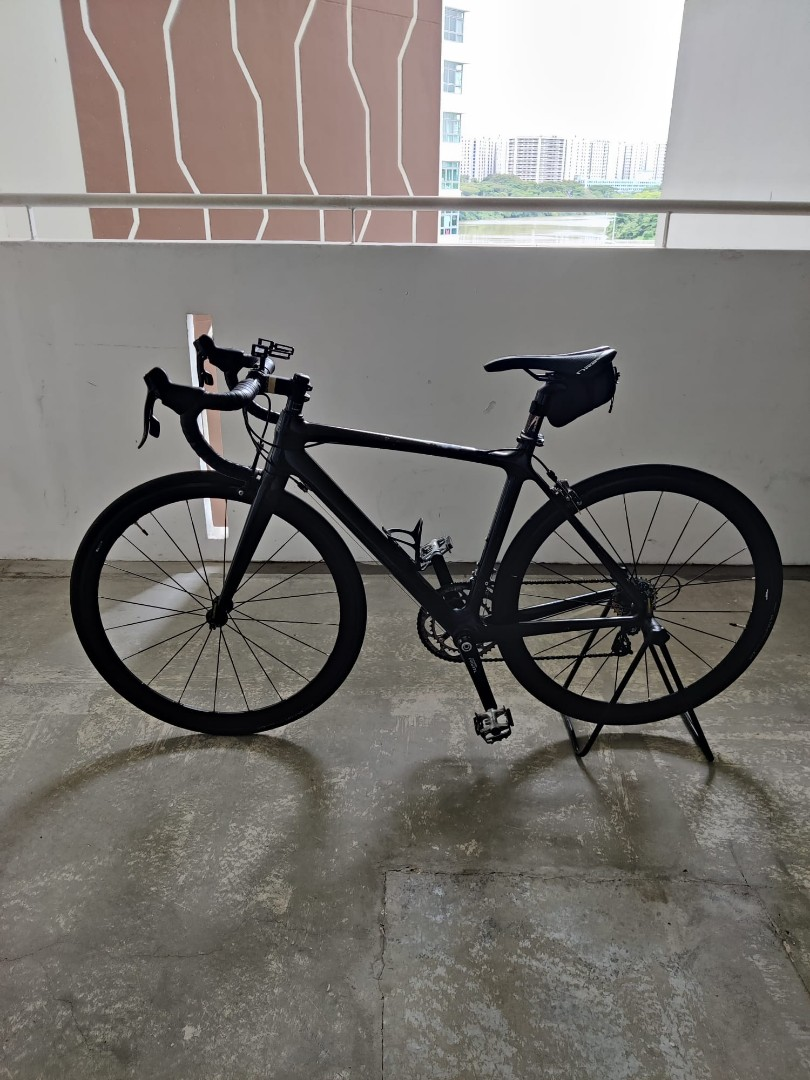

In [ ]:
# @title image
slink='https://www.carousell.sg/p/carbon-road-bike-1193565278/?t-id=ZY_WeNLbB4_1670510860551'
def get_img(slink):
    driver.get(slink)

    # <img alt="" class="D_uP D_uM D_aoJ" src="https://media.karousell.com/media/photos/products/2022/10/29/carbon_road_bike_1667057501_271c838c_progressive.jpg" title="">
    # *//img[@title='' and contains(@src,'media/photos/products/')]
    got_img = driver.find_elements(By.XPATH,"*//img[@title='' and contains(@src,'media/photos/products/')]")
    if got_img: img_src = got_img[0].get_attribute("src")
    else: img_src = None
    print(img_src)

    from PIL import Image
    ## !pip install requests
    import requests
    r = requests.get(img_src) #, stream=True)
    with open('img.jpg', 'wb') as img:
        img.write(r.content)
    return img_src
img_src = get_img(slink)

# # https://stackoverflow.com/questions/49092390/displaying-getting-images-from-an-url-in-python
# from io import BytesIO
# img = Image.open(BytesIO(r.content))
# # img = Image.open(r.raw)
# # display(img)

# https://stackoverflow.com/questions/49478791/how-can-i-open-images-in-a-google-colaboratory-notebook-cell-from-uploaded-png-f
from IPython.display import HTML
from base64 import b64encode
def show_img():
    img = open("/content/img.jpg", 'rb').read()
    data_url = 'data:image/jpeg;base64,' + b64encode(img).decode()
    display(HTML("<img src='%s' width=100>" % (data_url)))
show_img()


# driver.quit()

In [ ]:
# @title google lens

def lens():
    lens_url="https://lens.google.com/search?p=0"
    driver.get(lens_url)

    # driver.switch_to.default_content()
    # WebDriverWait(driver, 3).until(EC.presence_of_element_located((By.XPATH, "*//button[text()='Show more results']")))

    # *//button[@aria-haspopup="menu"]
    upload = driver.find_elements(By.XPATH,"*//button[@aria-haspopup='menu']")
    if upload: upload[0].click()
    # *//li[@role="menuitem"]
    from_com = driver.find_elements(By.XPATH,"*//li[@role='menuitem']")
    if from_com: from_com[0].click()

    # /content/img.jpg
    driver.find_elements(By.XPATH,'//input[@type="file"]')[0].send_keys("/content/img.jpg")

    # <div dir="ltr" class="UAiK1e">Anime working conditions and the foreign animators - Sakuga Brasil</div>
    # *//div[@dir="ltr"]
    lens_results = driver.find_elements(By.XPATH,"*//div[@dir='ltr']")
    print(len(lens_results))

    captions=''
    for i,result in enumerate(lens_results):
        print(str(i)+": "+result.text)
        captions+=result.text
        if i>=5: break
    return captions
captions=lens()



https://media.karousell.com/media/photos/products/2022/10/29/carbon_road_bike_1667057501_271c838c.jpg


IndexError: ignored